# Project: Investigate medical students dataset 
Created by ENG Abdlrhman zyead


## Introduction

### medical students dataset is a community built medical students dataset.This data set contains information about 20,000 medical student collected from medical students dataset. it includes 20,000 rows and 13 columns. Thorugh medical students dataset investigation different packages are used (pandas, numpy, matplotlib).

### Before the analysis of the dataset, data wrangling phase has been conducted to clean the data from unimportant columns, noisy data, and other problems. Before data wrangling phase, general properities about the dataset has been addressed.

### questions that is analyized in the dataset: 

#### 1- Information about students who has diabates
#### 2- Count smoking students 
#### 3- Correlation between Height	and Weight and BMI
#### 4- Show how blood preasure vary between smokers and non-smokers
#### 5- Show the distribution of female and male numbers in each blood type
#### 6- The number of people with diabetes and smoke at the same time
#### 7- Information about students' heart rate depending on Gender 
#### 8- How effected is the Cholesterol level by the weight
#### 9- Information about stodents' temperatures
#### 10- weight graph by age distribution 

In [ ]:
# import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-dark')

## the database before cleaning

## Data Wrangling

### General Properties

In [ ]:
# Load csv file named medical_students_dataset.csv into data frame DF
df = pd.read_csv(r"C:\Users\Hany Alrashidy\OneDrive\Desktop\medical_students_dataset.csv")

# dimensions of DF
print("Dimensions of DF: ", df.shape)

# print Information of DF
print("\nInformation about DF: ")
print(df.info())

# First ten rows of DF
print("\nHead of DF: \n", df.head(10))

Dimensions of DF:  (200000, 13)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood_Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart_Rate      180000 non-null  float64
 9   Blood_Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Head of DF: 
    Student ID   Age  Gender      Height     Weight Blood_Type        B

In [ ]:
df.set_index("Student ID", inplace = True)

## Data Cleaning
### fixing or removing incorrect, duplicate,noisy, or incomplete data within a dataset.
# ______________________________________________________________
### Problems With the dataset
#### 1: Remove unused Columns (if exist)
#### 2: Remove duplication in the rows (check and process if exist)
#### 3: Remove rows contains noisy data (Some movies has 'zero' budget or revenue. So, we need to discard it)
#### 4: Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data) 

## 1: Remove unused Columns (if exist)
### we don't have any unused columns
## 2: Remove duplication in the rows (check and process if exist)


In [ ]:
# Number of rows (in advance)
print("Number of rows BEFORE removing duplicates:  ", df.shape[0])
# check Rows Duplication
duplicated_rows = sum(df.duplicated())
print("Duplicated rows to remove:                  ", duplicated_rows)
if(duplicated_rows):
    df.drop_duplicates(keep ='first', inplace=True)
print("Number of rows AFTER Removing duplication:  ", df.shape[0])

Number of rows BEFORE removing duplicates:   200000
Duplicated rows to remove:                   9296
Number of rows AFTER Removing duplication:   190704


In [ ]:
df

,Age,Gender,Height,Weight,Blood_Type,BMI,Temperature,Heart_Rate,Blood_Pressure,Cholesterol,Diabetes,Smoking
Student ID,,,,,,,,,,,,
1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No


## 3- Remove rows contains noisy data (Some student has 'zero' Height or Weight or BMI or Temperature or Heart Rate or Blood Pressure or Cholesterol)

In [ ]:
"""Number of Rows before removing rows contains zero value in  'zero'Height or Weight or
BMI or Temperature or Heart Rate or Blood Pressure or Cholesterol columns"""
print("Number of rows before removing noisy data: ", df.shape[0])

# drop rows where value of a 'Height' column is zero
df.drop(df.index[df['Height'] == 0], inplace = True)

# drop rows where value of a 'Weight' column is zero
df.drop(df.index[df['Weight'] == 0], inplace = True)

# drop rows where value of a 'Temperature' column is zero
df.drop(df.index[df['Temperature'] == 0], inplace = True)

# drop rows where value of a 'Heart Rate' column is zero
df.drop(df.index[df['Heart_Rate'] == 0], inplace = True)

# drop rows where value of a 'Blood Pressure' column is zero
df.drop(df.index[df['Blood_Pressure'] == 0], inplace = True)

# drop rows where value of a 'Cholesterol' column is zero
df.drop(df.index[df['Cholesterol'] == 0], inplace = True)

"""Number of Rows after removing rows contains zero value in  'zero'Height or Weight or
BMI or Temperature or Heart Rate or Blood Pressure or Cholesterol columns"""
print("Number of rows after removing noisy data: ", df.shape[0])

Number of rows before removing noisy data:  190704
Number of rows after removing noisy data:  190704


## 4- Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data)

In [ ]:
# Display all information about columns on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190704 entries, 1.0 to 100000.0
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             170828 non-null  float64
 1   Gender          170796 non-null  object 
 2   Height          170815 non-null  float64
 3   Weight          170816 non-null  float64
 4   Blood_Type      170806 non-null  object 
 5   BMI             170825 non-null  float64
 6   Temperature     170819 non-null  float64
 7   Heart_Rate      170820 non-null  float64
 8   Blood_Pressure  170831 non-null  float64
 9   Cholesterol     170832 non-null  float64
 10  Diabetes        170827 non-null  object 
 11  Smoking         170822 non-null  object 
dtypes: float64(8), object(4)
memory usage: 18.9+ MB


### Using info function on DF, all columns has nulls
#### but only afew of them impacts our data will give them the mean value (BMI, Height and weight) 

In [ ]:
# Calculate the mean of the 'BMI' column (excluding NaN values)
mean_bmi = df['BMI'].mean()

# Fill NaN values in the 'BMI' column with the calculated mean
df['BMI'].fillna(mean_bmi, inplace=True)

In [ ]:
# Calculate the mean of the 'Height' column (excluding NaN values)
mean_Height = df['Height'].mean()

# Fill NaN values in the 'Height' column with the calculated mean
df['Height'].fillna(mean_Height, inplace=True)

In [ ]:
# Calculate the mean of the 'Weight' column (excluding NaN values)
mean_Weight = df['Weight'].mean()

# Fill NaN values in the 'Weight' column with the calculated mean
df['Weight'].fillna(mean_Weight, inplace=True)

## Exploratory Data Analysis
### Descriptive statistics about DF

In [ ]:
#descriptive statistics
df.describe()

,Age,Height,Weight,BMI,Temperature,Heart_Rate,Blood_Pressure,Cholesterol
count,170828.000000,190704.000000,190704.000000,190704.000000,170819.000000,170820.000000,170831.000000,170832.000000
mean,26.021279,174.956406,69.984416,23.340135,98.601141,79.510192,114.564494,184.489838
std,4.891984,13.674095,16.395700,6.655984,0.500152,11.543411,14.404207,37.548661
min,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,163.939878,56.707263,18.411403,98.265106,70.000000,102.000000,152.000000
50%,26.000000,174.956406,69.984416,23.340135,98.599527,80.000000,115.000000,184.000000
75%,30.000000,186.015722,83.250755,27.228786,98.940375,90.000000,127.000000,217.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


<Axes: >

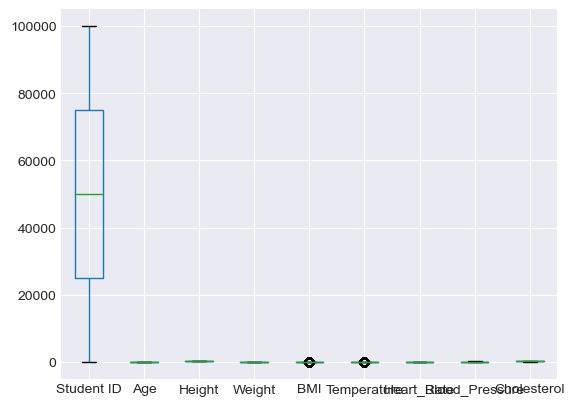

In [ ]:
# Load csv file named medical_students_dataset.csv into data frame DF
df = pd.read_csv(r"C:\Users\Hany Alrashidy\OneDrive\Desktop\medical_students_dataset.csv")
df2 = df.head()

df2.boxplot()

## From the above result, we get some important insights:

####  1- Minimum heart rate = 60, average = 79.510192, and maximum = 99
####  2- Youngest student is 18 year old and the oldest is 34 year old  
####  3- The mean and the median in all columns are almost the same which leads to a normal distributions
####  4- Minimum BMI = 10.074837, average = 23.34013, and maximum = 44.355113
####  5- Students bodys' temperature is between 96 and 101 around 98 as a mean
####  6- Blood Pressure Ranges from 90 to 139

## Research Question 1:  Information about students who has Diabetes

Number of yes : 18014
Number of no : 161986
Number of not answered or empty : 20000


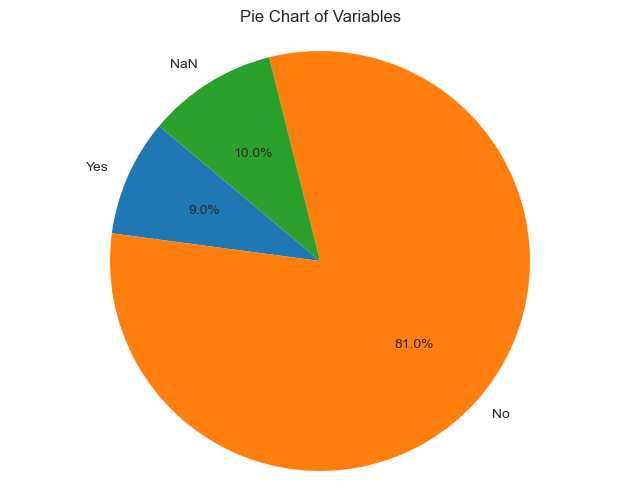

In [ ]:
yes = df[df["Diabetes"] == 'Yes'].shape[0]
print("Number of yes :", yes)
no = df[df["Diabetes"] == 'No'].shape[0]
print("Number of no :", no)
NaN= df['Diabetes'].isna().sum()
print("Number of not answered or empty :", NaN)

# Values for the pie chart
values = [yes, no, NaN]

# Labels for each value
labels = ['Yes', 'No', 'NaN']

# Creating the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Variables')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## Research Question 2:  count smoking students 

In [ ]:
# count each how many of each age of smokes
ages=[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
for i in ages:
    years_old_number= df[df["Age"] == i].shape[0]
    years_old_df= df[df["Age"] == i]
    year_smoking= years_old_df[years_old_df["Smoking"] == 'Yes'].shape[0]
    print("out of ",years_old_number, ' student that is ', i ,' years old' , year_smoking ,' of them smokes' ) 

#count the yes answers
yes = df[df["Smoking"] == 'Yes'].shape[0]
print("Number of yes :", yes)

#count the no answers
no = df[df["Smoking"] == 'No'].shape[0]
print("Number of no :", no)

#count the un-answered or empty
NaN= df['Smoking'].isna().sum()
print("Number of not answered or empty :", NaN)

out of  10383  student that is  18  years old 1880  of them smokes
out of  10413  student that is  19  years old 1868  of them smokes
out of  10566  student that is  20  years old 1891  of them smokes
out of  10677  student that is  21  years old 1894  of them smokes
out of  10691  student that is  22  years old 1984  of them smokes
out of  10335  student that is  23  years old 1919  of them smokes
out of  10600  student that is  24  years old 1863  of them smokes
out of  10683  student that is  25  years old 1927  of them smokes
out of  10486  student that is  26  years old 1852  of them smokes
out of  10755  student that is  27  years old 1818  of them smokes
out of  10882  student that is  28  years old 1963  of them smokes
out of  10676  student that is  29  years old 1910  of them smokes
out of  10439  student that is  30  years old 1866  of them smokes
out of  10541  student that is  31  years old 1969  of them smokes
out of  10510  student that is  32  years old 1985  of them sm

### total number of smoking students and non-smoking

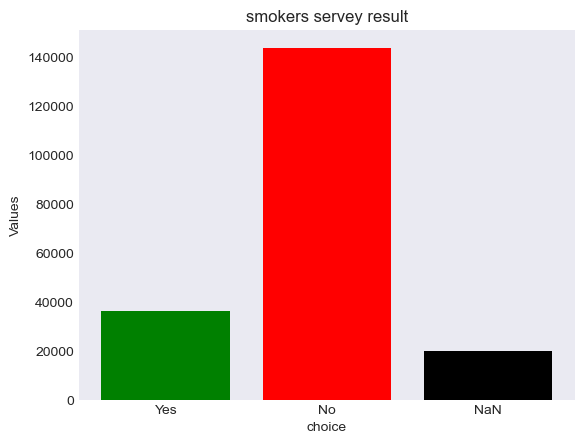

In [ ]:
# X-axis positions for the bars
x_values = [1, 2,3]

# Heights of the bars
heights = [yes, no, NaN]

# Labels for the bars
labels = ['Yes', 'No' , 'NaN']

# Creating a bar plot
plt.bar(x_values, heights, tick_label=labels, color=['green', 'red', 'black'])
plt.xlabel('choice')
plt.ylabel('Values')
plt.title('smokers servey result')
plt.show()



## Research Question 3:  Correlation between Height, Weight and BMI

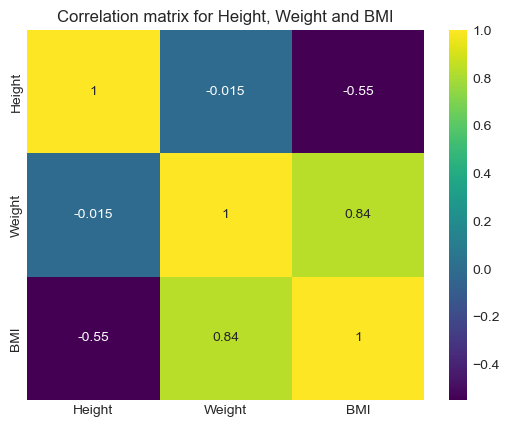

In [ ]:
# construct df_ from three columns of the DF (Height, Weight and BMI)
df2 = pd.read_csv(r"C:\Users\Hany Alrashidy\OneDrive\Desktop\medical_students_dataset - plt.csv")
df2= df2[['Height', 'Weight' , 'BMI']]

# compute correlation using pearson correlation cofficient
corr_mat=df2.corr(method='pearson')

#draw the heatmap
sns.heatmap(corr_mat, cmap='viridis' , annot = True)
#set title
plt.title("Correlation matrix for Height, Weight and BMI")
# show plot
plt.show()

## From the above Heatmap: correlation is computed for each two variable: There  is a string positive correlation between Weight and BMI(0.84). There is weak negative correlation between BMI and Height. in addition there is a negative correlation between weight and height.

## Research Question 4: show how blood pressure vary between smokers and non-smokers

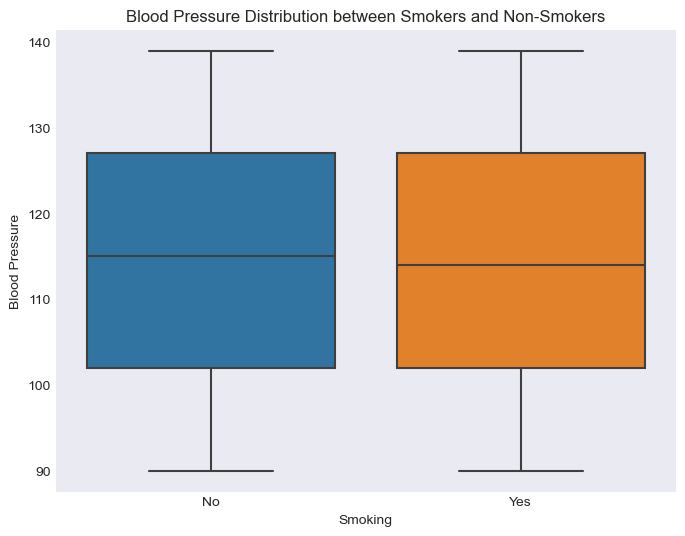

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Smoking', y='Blood_Pressure', data=df)
plt.xlabel('Smoking')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure Distribution between Smokers and Non-Smokers')
plt.show()

### from this graph, we understand that smoking doesn't effect the Blood Pressure alot. However, smoking is not good for your health

## Research Question 5: show the distribution of female and male numbers in each blood type 

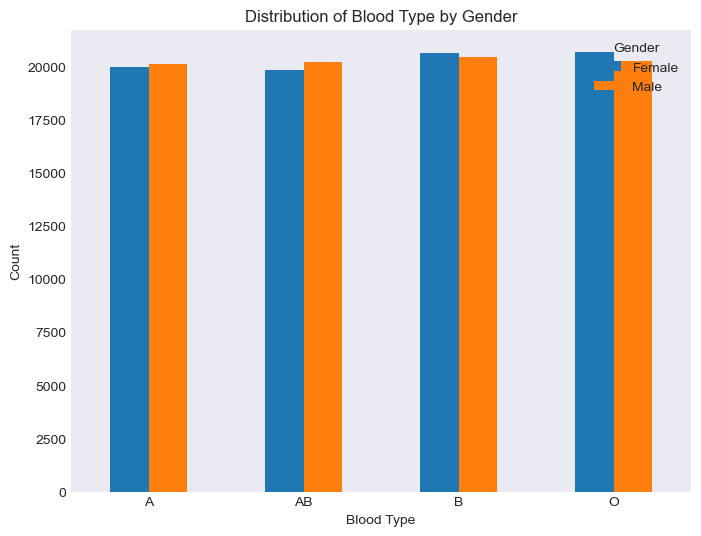

In [ ]:
# Crosstab to count the frequency of each combination of Blood Type and Gender
cross_tab = pd.crosstab(df['Blood_Type'], df['Gender'])

# Bar plot to visualize the relationship between Blood Type and Gender
cross_tab.plot(kind='bar', figsize=(8, 6) ,)
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.title('Distribution of Blood Type by Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

### in this graph, we see that numbers of females that has the blood type B or O is more that males. However, males has more A and AB blood type other than females

## Research Question 6: The number of people with diabetes and smoke at the same time

Number of students with diabetes: 18014
Number of students who smokes: 36029
Number of people with diabetes and smoke at the same time: 3236


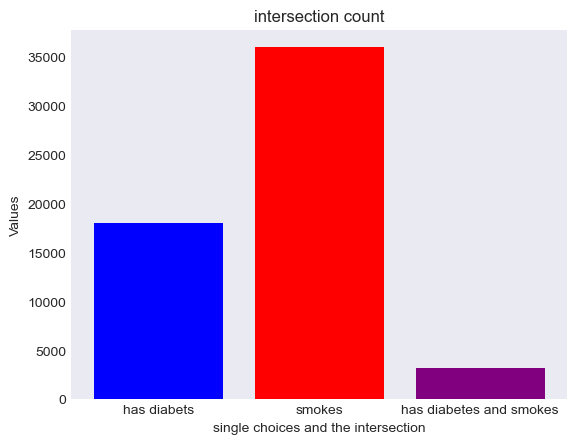

In [ ]:
# Count the number of students with diabetes
diabetes_count = df[df['Diabetes'] == 'Yes'].shape[0]
print("Number of students with diabetes:", diabetes_count)

# Count the number of student smoking
Smoking_count = df[df['Smoking'] == 'Yes'].shape[0]
print("Number of students who smokes:", Smoking_count)

# Count the number of student with diabetes and smoking at the same time
diabetes_and_smoke_count = df[(df['Diabetes'] == 'Yes') & (df['Smoking'] == 'Yes')].shape[0]
print("Number of people with diabetes and smoke at the same time:", diabetes_and_smoke_count)

# X-axis positions for the bars
x_values = [1, 2,3]

# Heights of the bars
heights = [diabetes_count, Smoking_count, diabetes_and_smoke_count]

# Labels for the bars
labels = ['has diabets', 'smokes' , 'has diabetes and smokes']

# Creating a bar plot
plt.bar(x_values, heights, tick_label=labels, color=['blue', 'red', 'purple'])
plt.xlabel('single choices and the intersection')
plt.ylabel('Values')
plt.title('intersection count')
plt.show()

## Research Question 7: information about students' heart rate depending on Gender 

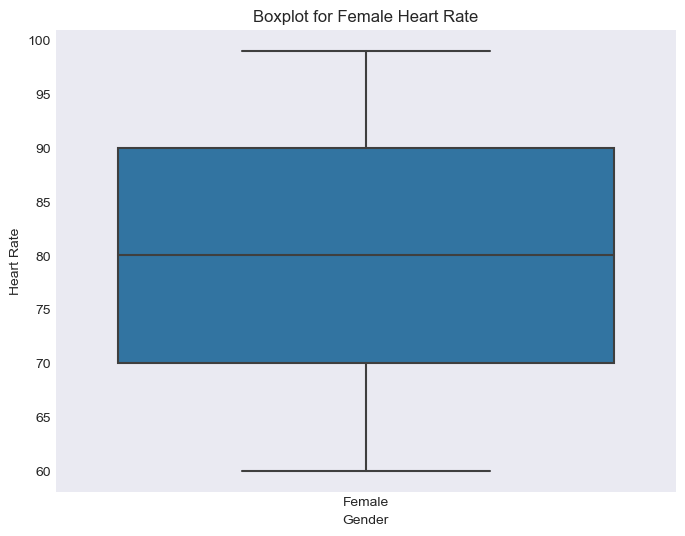

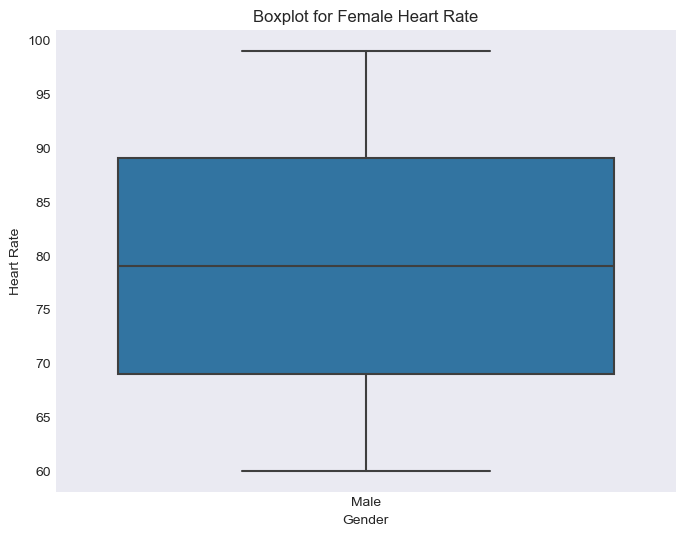

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['Gender'] == 'Female'], x='Gender', y='Heart_Rate')
plt.title('Boxplot for Female Heart Rate')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['Gender'] == 'Male'], x='Gender', y='Heart_Rate')
plt.title('Boxplot for Female Heart Rate')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.show()

### As we notice here, famales' heart rate is slightly higher that mens' heart rate 

## Research Question 8: How effected is the Cholesterol level by the weight

In [ ]:
# Calculate the correlation between Weight and Cholesterol
df2 = pd.read_csv(r"C:\Users\Hany Alrashidy\OneDrive\Desktop\medical_students_dataset - plt.csv")
correlation = df2['Weight'].corr(df2['Cholesterol'])

print(f"Correlation between Weight and Cholesterol: {correlation}")

# Create a scatter plot for Weight vs Cholesterol
plt.figure(figsize=(8, 6))
plt.scatter(df2['Weight'], df2['Cholesterol'])
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Weight vs Cholesterol')
plt.grid(True)
plt.show()

: 

### according to our dataset the correlation between the weight and the cholesterol level is weak nagative relation which means High cholesterol can affect anyone, regardless of their weight.However, having excess body weight can lead to increased cholesterol levels in normal medical cases

## Research Question 9: information about stodents' temperatures

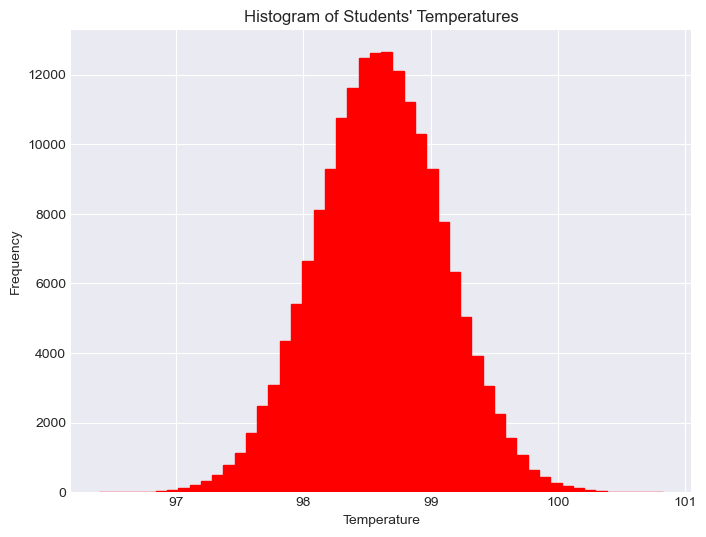

In [ ]:
# Create a histogram for students' temperatures frequencies
plt.figure(figsize=(8, 6))
plt.hist(df['Temperature'], bins=50, color='red', edgecolor='red')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Students\' Temperatures')
plt.grid(True)
plt.show()

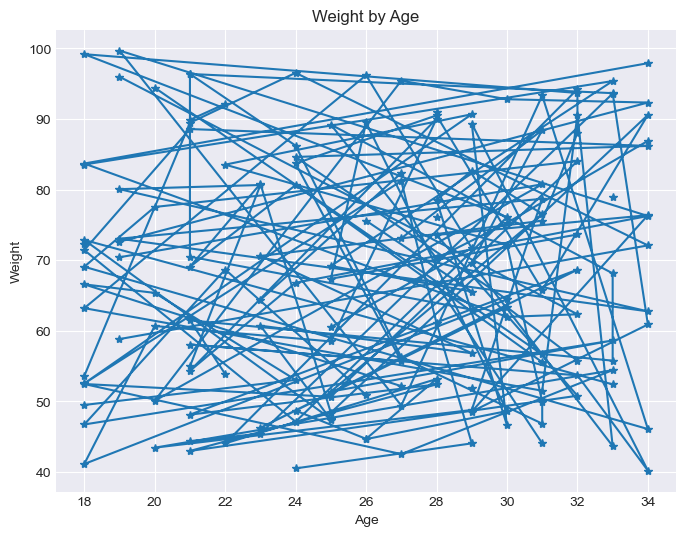

In [ ]:
# import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-dark')
df2 = pd.read_csv(r"C:\Users\Hany Alrashidy\OneDrive\Desktop\medical_students_dataset - plt.csv") 
plt.figure(figsize=(8, 6))
plt.plot(df2['Age'], df2['Weight'], marker='*', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Weight by Age')
plt.grid(True)
plt.show()

# Conclusions
### This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed or treated. For example null values is an obstacle which stopped me when I was analyzing the counts. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation between Height, Weight and BMI. there are a number of student who smokes which is bad for a student in such a young age. Finally there is a positive correlation between some of the features of the midical student dataset but we also have negative ones.

### After the Exploratort Data Analysis we can conclude that:

####  1- Minimum heart rate = 60, average = 79.510192, and maximum = 99
####  2- Youngest student is 18 year old and the oldest is 34 year old  
####  3- The mean and the median in all columns are almost the same which leads to a normal distributions
####  4- Minimum BMI = 10.074837, average = 23.34013, and maximum = 44.355113
####  5- Students bodys' temperature is between 96 and 101 around 98 as a mean
#### 6- most of the students are non-smokers
#### 7- most of the students don't have diabetes
#### 10- There is a strong positive relation between weight and BMI
#### 11- the smoking habbit is more common in 28-year-old  students


# Machine Learning section

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split 

df = pd.read_csv(r"Downloads\delaney_solubility_with_descriptors.csv")
y = df['logS']
x = df.drop('logS' , axis = 1)

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size =0.2, random_state = 100)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
# y_train
# y_lr_train_pred

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

# print(f"MLresultoflearn MSE (Train): ", lr_train_mse)
# print(f"LR MSE (Train): ", lr_train_r2)
# print(f"LR MSE (Train): ", lr_test_mse)
# print(f"LR MSE (Train): ", lr_test_r2)
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse , lr_test_r2]).transpose()
# give Discreptive Names To Columns
lr_results.columns = ['Method','Training MSE' , 'Training R2' , 'Test MSE' ,'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


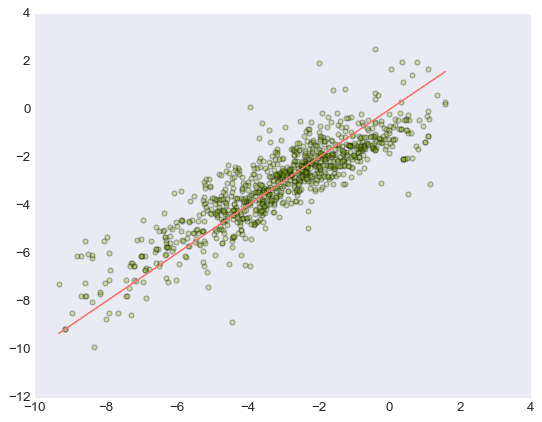

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train , y = y_lr_train_pred, c='#7CAE00' ,alpha = 0.3)
plt.plot(y_train,y_train, '#F8766D')
# To draw line use numpy